Run plasticity sim
- load the data
- recreate the plots
- save to vtk for the last step

# IO: Saving and loading simulations
The `FerriteProblems.jl` package includes support for saving simulation data using
[`JLD2.jl`](https://github.com/JuliaIO/JLD2.jl). This examples shows some examples
of how this can be done. Specifically, we use the data saved during the plasticity
example:

In [1]:
using Ferrite, FerriteProblems
import FerriteProblems as FP
include("plasticity.jl");

In that example, the displacements and state variables were saved in each time step.
In this example, we use the data saved in the folder `B` (using the `AdaptiveTimeStepper`)
and plot a few interesting cases:
* Maximum von Mises stress as function of time
* Export the final displacements and stress to `vtk`

We start by loading the results

In [2]:
io = FerriteIO("B/FerriteIO.jld2")
def = FP.getdef(io)
post = FP.getpost(io)

┌ Warning: type Main.##316.J2PlasticityMaterialState{Float64,Tensors.SymmetricTensor{2, 3, Float64, 6}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495
┌ Warning: type Main.##316.J2Plasticity{Float64,Tensors.SymmetricTensor{4, 3, Float64, 36}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495
┌ Warning: type Main.##316.J2PlasticityMaterialState{Float64,Tensors.SymmetricTensor{2, 3, Float64, 6}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495
┌ Warning: some parameters could not be resolved for type FerriteNeumann.NeumannData{Ferrite.FaceVectorValues{3, Float64, Ferrite.RefTetrahedron, 9},Main.##316.#traction_function}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:485
┌ Warning: type Main.##316.PlasticityPostProcess{Float64

JLD2.ReconstructedTypes.var"##Main.##316.PlasticityPostProcess{Float64}#322"([500000.0, 1.1299605249474365e6, 1.9236610509315364e6, 2.9236610509315366e6, 4.1835821008264096e6, 5.770983152794609e6, 6.770983152794609e6, 7.400943677742044e6, 7.797793940734095e6, 7.996219072230119e6  …  9.12121907223012e6, 9.22121907223012e6, 9.321219072230121e6, 9.421219072230121e6, 9.521219072230121e6, 9.621219072230121e6, 9.721219072230121e6, 9.821219072230121e6, 9.91060953611506e6, 1.0e7], [0.006815329547579407, 0.015402106706896984, 0.026220768000677703, 0.03985142709639491, 0.05702498141503005, 0.07979733707960711, 0.09907207720979865, 0.11466565445552128, 0.12743702629702092, 0.1351812607076449  …  0.19459372101970185, 0.20087646888231966, 0.20728843754383508, 0.21380163221532736, 0.22046979790645901, 0.22731699689335275, 0.23427765230180259, 0.2413544766399844, 0.24778203171771976, 0.2542902161462004])

Then, we get the time history and the displacement data saved to the `post` struct

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: linuxfb, minimal, offscreen, vnc, xcb.

Aborted (core dumped)
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: linuxfb, minimal, offscreen, vnc, xcb.

Aborted (core dumped)
connect: Connection refused
GKS: can't connect to GKS socket app

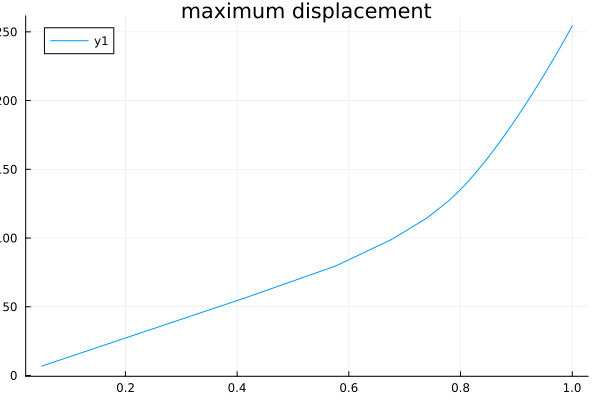

In [3]:
t_history = FP.gettimedata(io)
u_mag = post.umag

plt1 = plot()
plot!(plt1, t_history, u_mag*1e3)
title!(plt1, "maximum displacement")
xlabel!(plt1, "time [s]")
ylabel!(plt1, "umax [mm]")

display(plt1)

The maximum von Mises stress for each step is calculated next. Note that `step` refers
to the count of saved steps, and not the actual simulation steps.

In [4]:
function get_max_vm_stress(step)
    states = FP.getipdata(io, step, "state")
    σ_vm = maximum(cellstates -> maximum(state -> vonMises(state.σ), cellstates), states)
    return σ_vm
end

σ_vm = get_max_vm_stress.(1:length(t_history))

┌ Warning: type Main.##316.J2PlasticityMaterialState{Float64,Tensors.SymmetricTensor{2, 3, Float64, 6}} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495


30-element Vector{Float64}:
 2.042097852752608e7
 4.6149799235023126e7
 7.856608203336987e7
 1.19408039090352e8
 1.708656805053461e8
 2.0249691404122844e8
 2.064372591325652e8
 2.102227286443594e8
 2.1366874417491034e8
 2.157200492316552e8
 ⋮
 2.3228259677810565e8
 2.3381379726995972e8
 2.3535243849567205e8
 2.369087781187164e8
 2.3849660814789727e8
 2.4009881044948807e8
 2.4171181164994454e8
 2.4317017188261086e8
 2.4464235996036947e8

Plot the analyzed results

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: linuxfb, minimal, offscreen, vnc, xcb.

Aborted (core dumped)
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: linuxfb, minimal, offscreen, vnc, xcb.

Aborted (core dumped)
connect: Connection refused
GKS: can't connect to GKS socket app

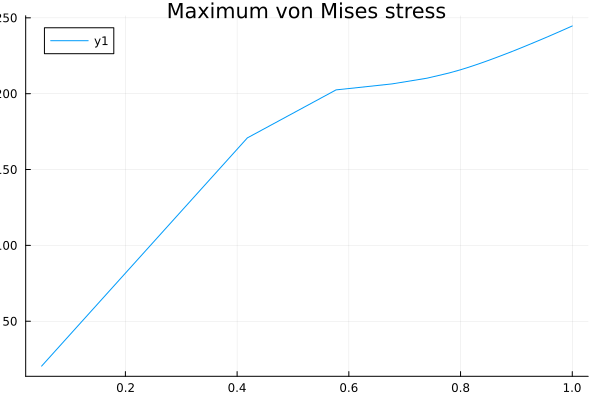

In [5]:
plt2=plot()
plot!(plt2, t_history, σ_vm*1e-6)
title!(plt2, "Maximum von Mises stress")
xlabel!(plt2, "time [s]")
ylabel!(plt2, "stress [MPa]")

display(plt2)

Finally, we extract the degrees of freedom and the stresses in each element
at the last step to save to vtk.

In [6]:
step = length(t_history)
u = FP.getdofdata(io, step)
states = FP.getipdata(io, step, "state")
dh = FP.getdh(def)
mises_values = zeros(getncells(dh.grid))
for (el, cell_states) in enumerate(states)
    for state in cell_states
        mises_values[el] += vonMises(state.σ)
    end
    mises_values[el] /= length(cell_states) # average von Mises stress
end
vtk_grid("plasticity", dh) do vtkfile
    vtk_point_data(vtkfile, dh, u) # displacement field
    vtk_cell_data(vtkfile, mises_values, "von Mises [Pa]")
end

1-element Vector{String}:
 "plasticity.vtu"

We do need to close any open files from the `io` object, which we simply do
by calling `close`:

In [7]:
close(io)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*